### Table of contents

1. [Project description](#Project-description)
2. [EDA](#EDA)  
   2.1 [Data review](#Data-review)  
   2.2 [Product values comparison](#Product-values-comparison)  
   2.3 [Features correlation analysis](#Features-correlation-analysis)
3. [Prediction models](#Prediction-models)
4. [Profit calculation](#Profit-calculation)
5. [Conclusion](#Conclusion)


### _Imports_


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams["figure.figsize"] = (7, 4)

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>


---


# Project description


### Objective


You work for a oil mining company. Use an ML model to find the best place for a new oil well. Calculate the profit and determine which region is best for mining.


### Data description


Geological exploration data for the three regions are stored in three files:

- [`geo_data_0.csv`](https://code.s3.yandex.net/datasets/geo_data_0.csv)
- [`geo_data_1.csv`](https://code.s3.yandex.net/datasets/geo_data_1.csv)
- [`geo_data_2.csv`](https://code.s3.yandex.net/datasets/geo_data_2.csv)

Where:

- *id* — unique oil well identifier
- *f0, f1, f2* — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- *product* — volume of reserves in the oil well (thousand barrels).


### Conditions

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of `500` points is carried with picking the best `200` points for the profit calculation.
- The budget for development of `200` oil wells is `100 USD million`.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is `4,500` dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.


---


# EDA


Read the data >>


In [3]:
data_1 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_0.csv")
data_2 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_1.csv")
data_3 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_2.csv")

## Data review


### _Region 1_


In [4]:
# Get a sample row
data_1.sample()

,id,f0,f1,f2,product
74450,QqSbL,0.744626,0.801772,0.570663,2.379027


In [5]:
# drop redundant column
data_1.drop(columns=["id"], inplace=True)

In [6]:
# Get general info about the dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [7]:
# Describe numerical values
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [8]:
# Check for dupclicated rows
data_1.duplicated().sum()

0

**NOTE:**

- The data seems to be clean: no missing values, no duplicates, no inappropriate data types.
- The `f2` feature has a wider dispersion than the others. We don't know anything about the significance of these values; maybe this feature should be scaled, maybe not.

Let's check other datasets >>


### _Region 2_


In [9]:
data_2.sample()

,id,f0,f1,f2,product
92275,dX9pd,11.686192,-1.694659,0.999591,26.953261


In [10]:
data_2.drop(columns=["id"], inplace=True)

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [12]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [13]:
data_2.duplicated().sum()

0

**NOTE:**

- The values of both the features and the product are distributed differently in this region.


### _Region 3_


In [14]:
data_3.sample()

,id,f0,f1,f2,product
83235,JwiZ5,-3.278921,1.342097,-0.485917,115.527442


In [15]:
data_3.drop(columns=["id"], inplace=True)

In [16]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [17]:
data_3.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


In [18]:
data_3.duplicated().sum()

0

**NOTE:**

- And again, the values differ. But in an adequate manner.


## Product values comparison


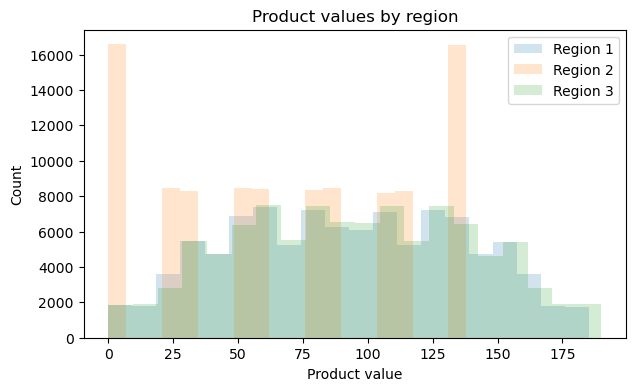

In [19]:
# Plot a histogram with product values for each region
plt.figure(figsize=(7, 4))
for data in [data_1, data_2, data_3]:
    plt.hist(data['product'], bins=20, alpha=.2)
plt.ylabel("Count")
plt.xlabel("Product value")
plt.legend(["Region 1", "Region 2", "Region 3"])
plt.title("Product values by region");

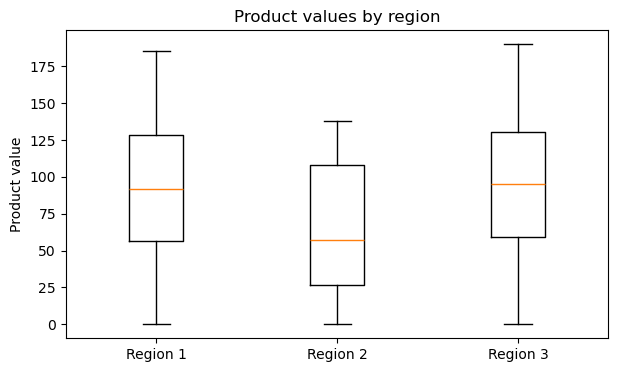

In [20]:
# Create a box plot for each region
plt.figure(figsize=(7, 4))
plt.boxplot([data['product'] for data in [data_1, data_2, data_3]])
plt.ylabel("Product value")
plt.xticks(ticks=[1, 2, 3], labels=["Region 1", "Region 2", "Region 3"])
plt.title("Product values by region");

**NOTE:**

- The product values for regions 1 and 3 are normally distributed. They are also alike.
- The 2-region product values are distributed in a discrete manner; this doesn't look natural, and statistics for this region values also noticeably differ from the other two regions' product values.
- There are no outliers in any of the regions.


## Features correlation analysis


### Region 1


In [21]:
# Check the Pearson correlation coefficient between columns
data_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


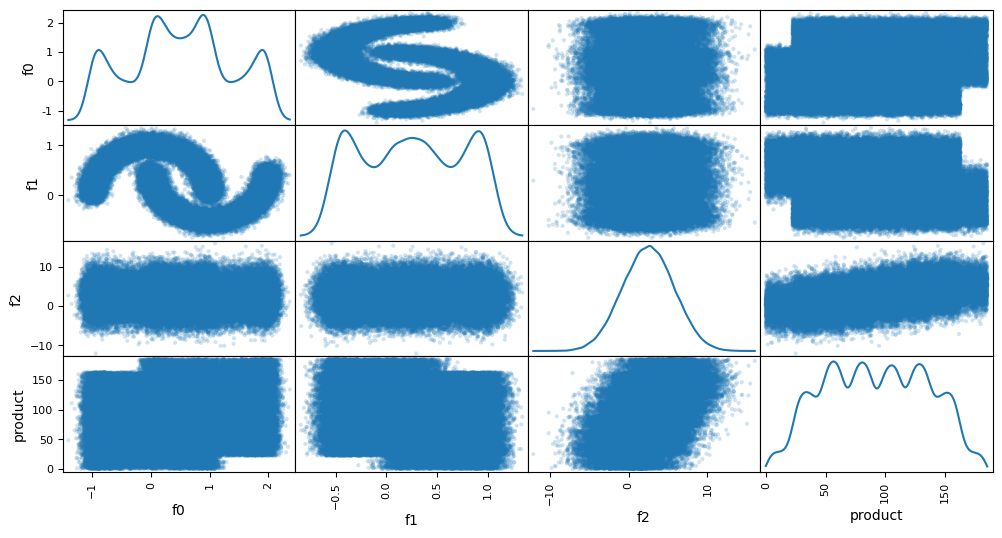

In [22]:
# Draw a matrix of scatter plots 
scatter_matrix(data_1, alpha=0.2, figsize=(12, 6), diagonal="kde");

**NOTE:**

- The `f2` feature shows a slight correlation with the product.
- The `f0` and `f1` features are related, but not in a linear way.
- The `f2` feature values distribution has a good bell-curve shape.


### Region 2


In [23]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


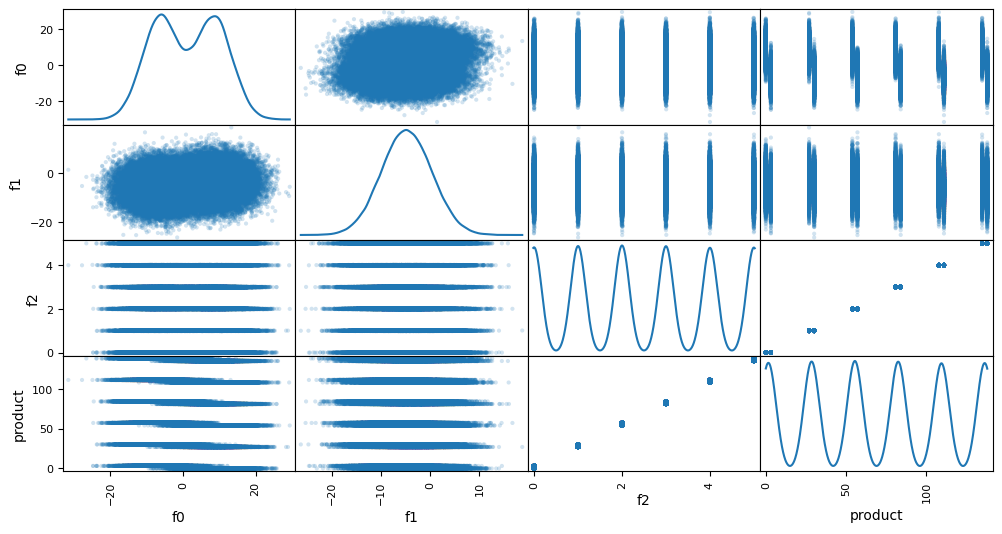

In [24]:
scatter_matrix(data_2, alpha=0.2, figsize=(12, 6), diagonal="kde");

**NOTE**

- The `product` and the `f2` feature have a discrete-type value distribution. These columns are also extremely correlated.  
  I am not sure that this data can be used for prediction model building. The `f2` column should be dropped at least.
- The features left don't seem to be related to each other, like in the case of the _Region 1_ data, or to the `product` value.


### Region 3


In [25]:
data_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


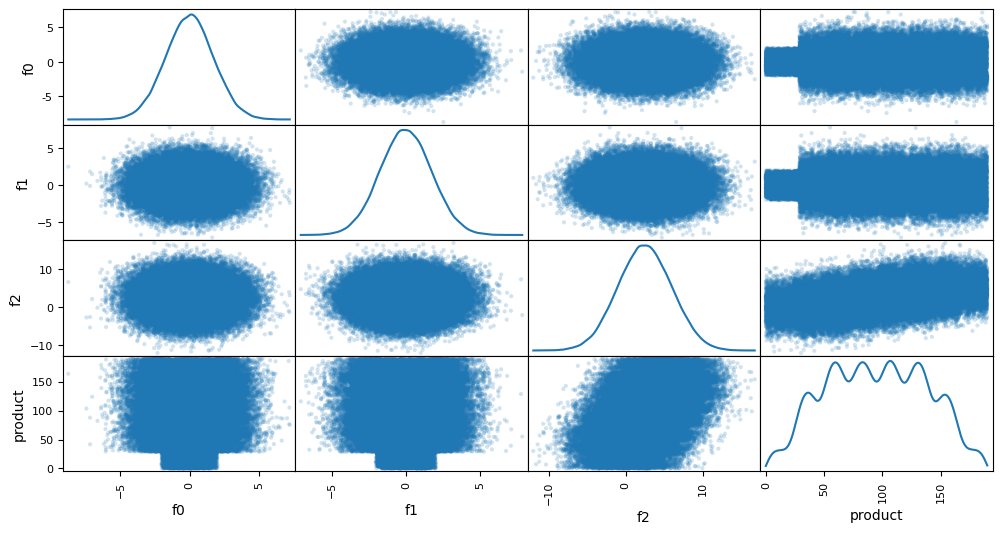

In [26]:
scatter_matrix(data_3, alpha=0.2, figsize=(12, 6), diagonal="kde");

**NOTE**

- Like in the case of _Region 1_, here also is a slight correlation between the `f2` and the `product`.
- Other features don't seem to be related.
- The values of each feature are normally distributed.


---


<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well! Great that distributions were visualized!
</div>


# Prediction models


### Build a function


In [27]:
def get_statistics(X, y, sample_size=500):
    """
    Takes features and target as inputs, trains the model and returns: 
    predicted, actual, r2, RMSE, reserves_volume
    """
    # Split the data into the train and a valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=12345)
    # Call and train the model
    lr = LinearRegression().fit(X_train, y_train)

    # Store the predicted and actual values into variables
    predicted = pd.Series(lr.predict(X_valid))
    actual = pd.Series(y_valid.values)

    # Get the score values
    r2 = lr.score(X_valid, y_valid)
    RMSE = mean_squared_error(actual, predicted, squared=False)

    # Get the average predicted volume for the the sample of 500 wells
    avg_predicted_volume = predicted.sample(n=sample_size, random_state=12345).sum() / sample_size

    print(f'Avg. pred. volume  {avg_predicted_volume:,.0f} \nR^2  {r2:.2%}\nRMSE  {RMSE:.4f}')
    # Get the min and max values for the target
    print(f'MIN  {actual.min():.0f}\nMAX  {actual.max():.0f}')

    return predicted, actual, r2, RMSE, avg_predicted_volume

### Predictions for _Region 1_


In [28]:
# Store the features and the target into separate variables
X1 = data_1.drop(["product"], axis=1)

y1 = data_1["product"]

In [29]:
predicted_1, actual_1, r2_1, RMSE_1, avg_predicted_volume_1 = get_statistics(X1, y1)

Avg. pred. volume  93 
R^2  27.99%
RMSE  37.5794
MIN  0
MAX  185


<Axes: >

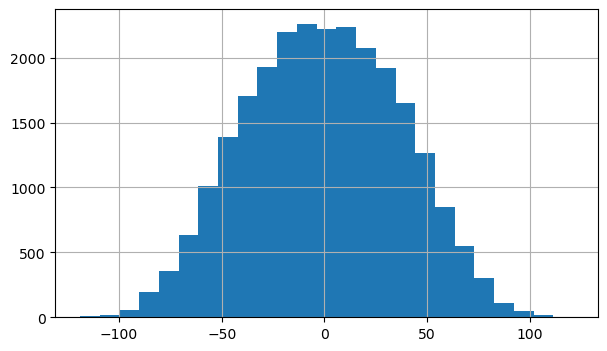

In [30]:
# Plot the residuals distribution
(actual_1 - predicted_1).hist(bins=25, figsize=(7, 4))

**NOTE**

- 28% reduction in the size of the residuals between the model predictions and the mean value. Not impressive.
- Compared to the minimum and maximum possible values for the `product` column, an average error of 38 is quite a lot.  
  From the histogram we can also see that an error can be greater than 100, which is more than half the maximum possible value.


### Predictions for _Region 2_


In [31]:
X2 = data_2.drop(["product"], axis=1)

y2 = data_2["product"]

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please don't remove "f2" feature. Data is correct.
</div>


In [32]:
predicted_2, actual_2, r2_2, RMSE_2, avg_predicted_volume_2 = get_statistics(X2, y2)

Avg. pred. volume  72 
R^2  99.96%
RMSE  0.8931
MIN  0
MAX  138


<Axes: >

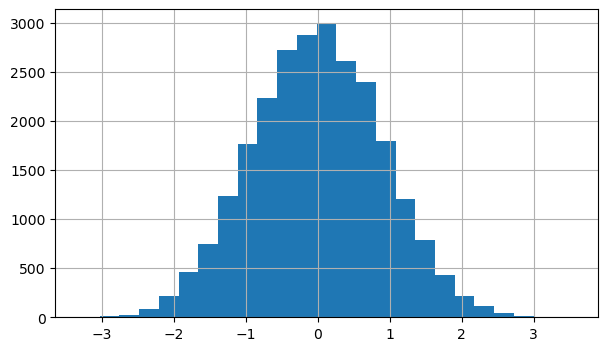

In [33]:
(actual_2 - predicted_2).hist(bins=25, figsize=(7, 4))

**NOTE**

- The model's predictions aren't any better than just using the average value.
- RMSE is higher, even though the data is less dispersed.


### Predictions for _Region 3_


In [34]:
X3 = data_3.drop(["product"], axis=1)

y3 = data_3["product"]

In [35]:
predicted_3, actual_3, r2_3, RMSE_3, avg_predicted_volume_3 = get_statistics(X3, y3)

Avg. pred. volume  95 
R^2  20.52%
RMSE  40.0297
MIN  0
MAX  190


<Axes: >

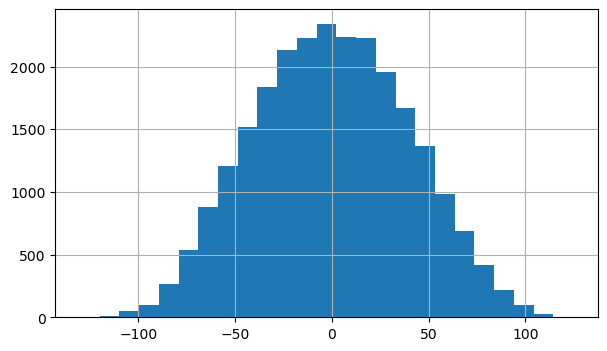

In [36]:
(actual_3 - predicted_3).hist(bins=25, figsize=(7, 4))

In [37]:
X3.shape

(100000, 3)

In [38]:
X2.shape

(100000, 3)

**NOTE**

- The prediction model doesn't do well too: only 20% better than the mean.
- The RMSE is not much different from the first region's data if we consider a little wider dispersion of the data.


---


<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've used function to avoid code duplication.
</div>


# Profit calculation


### Key values


Store all key values for profit calculation into variables >>


In [39]:
# Budjet for development of 200 wells
budget = 100000000

# Revenue from one unit of product
revenue = 4500

Calculate the volume of reserves necessary for a new well development without making losses >>


In [40]:
min_volume = budget / 200 / revenue

In [41]:
print(f'Min necessary volume: {min_volume}')
print("—————")
for i, item in enumerate([avg_predicted_volume_1, avg_predicted_volume_2, avg_predicted_volume_3]):
    print(f"Region {i + 1} avg volume: {item}")

Min necessary volume: 111.11111111111111
—————
Region 1 avg volume: 92.92815460984569
Region 2 avg volume: 71.8382126683144
Region 3 avg volume: 94.73109592789761


**NOTE**

- The minimum volume of reserves necessary for making profit is higher than the average volume in each region.

<div class="alert alert-block alert-success">
<b>Success:</b> The breakeven point was calculated correctly.
</div>


Write a function to calculate profit from a set of selected oil wells and model predictions >>


### Profit


<div class="alert alert-block alert-danger">

<b>Needs fixing:</b> Let me explain algorithm one more time:

1. From previous steps we get 25000 predicted and 25000 real values for each region.
2. In bootstrap, we randomly select 500 points out of 25000 and pass them into function for profit calculation.
   1. This function select best 200 wells by predicted values.
   2. After that we calculate revenue with the help of real values of <b>corresponding</b> wells.
   3. At the end of this function we calculate `profit=revenue-costs`.
3. We run 1000 times algorithm that is described above [each time sample 500 random wells out of 25000] and add all values [i mean result of "profit" function] to list (e.g. `profit_list`).
4. After that we calculate mean of this list, risk of losses and confidence interval.
</div>


<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you've used loops/functions to avoid code duplication.
</div>


In [42]:
def get_profit(predicted, actual, random_state=12345):
    predicted_sample = (predicted
                        .sample(500, random_state=random_state)
                        .sort_values(ascending=False)
    [:200])
    target_volume = actual[predicted_sample.index].sum()
    profit = target_volume * revenue - budget
    return profit

Get the amount of profit from developing 200 bets wells in each region.


In [43]:
get_profit(predicted_1, actual_1)

6790688.578924254

In [44]:
get_profit(predicted_2, actual_2)

7794798.84176816

In [45]:
get_profit(predicted_3, actual_3)

4399901.430221811

**NOTE**

- Although the average predicted volume in Region 1 is a little bit lower than that in Region 3, the profit from developing 200 best wells is predicted to be greater in Region 1.


### Calculate risks and profit for each region


Create a bootstrapping function that calculates the risk of losses, the average profit and the confidence interval >>


In [53]:
def bootstrapping(predicted, actual, n_iterations=1000):
    random_state = np.random.RandomState(12345)

    profits = pd.Series(name="profits")
    losses_counter = 0

    for i in range(n_iterations):
        profit = get_profit(predicted, actual, random_state)
        profits.loc[i] = profit

        if profit < 0:
            losses_counter += 1

    average_profit = profits.sum() / n_iterations
    risk_of_losses = losses_counter / n_iterations

    lower_quantile = profits.quantile(0.025)
    upper_quantile = profits.quantile(0.975)

    # return (risk_of_losses,
    #         average_profit, 
    #         lower_quantile,
    #         upper_quantile)

    return print(
        f"Losses risk   {risk_of_losses:.2%} \nAvg profit   ${average_profit:,.2f} \n\n95% cofidence interval: \nLower   ${lower_quantile:,.2f} \nUpper  ${upper_quantile:,.2f}")


Compare the values for each region >>


<div class="alert alert-block alert-success">
<b>Success:</b> Risk of losses and confidence interval were calculated correctly!
</div>


In [54]:
bootstrapping(predicted_1, actual_1)

Losses risk   7.20% 
Avg profit   $3,807,108.91 

95% cofidence interval: 
Lower   $-1,269,476.38 
Upper  $8,796,139.68


In [55]:
bootstrapping(predicted_2, actual_2)

Losses risk   1.40% 
Avg profit   $4,482,310.65 

95% cofidence interval: 
Lower   $708,993.85 
Upper  $8,929,852.50


In [56]:
bootstrapping(predicted_3, actual_3)

Losses risk   7.10% 
Avg profit   $4,027,965.87 

95% cofidence interval: 
Lower   $-1,436,593.07 
Upper  $9,630,261.54


---


# Conclusion


Regions 1 and 3 have too high risk of losses, which we cannot accept. Region 2 also has the biggest average profit, so we suggest developing new oil wells in Region 2.
